### Keras 模型建立

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, normalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


###  1. 模型构建

In [2]:
def CNN_():
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(normalization.BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(normalization.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
                         
    model.add(Conv2D(96, (3,3), padding='same', activation='relu'))
    model.add(normalization.BatchNormalization())
    model.add(Conv2D(96, (3,3), padding='same', activation='relu'))
    model.add(normalization.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(196, (3,3), padding='same', activation='relu'))
    model.add(normalization.BatchNormalization())
    model.add(Conv2D(196, (3,3), padding='same', activation='relu'))
    model.add(normalization.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
                         
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))        
    
    model.summary()
    return model

In [3]:
model = CNN_()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        55392     
__________

###  2. 定义损失函数和训练模型

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

### 3. 定义可变的学习速率

In [5]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

### 4. 加载数据

In [6]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

### 5. 修改数据格式

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [8]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

### 6. 训练模型并保存

In [9]:
checkpoint = ModelCheckpoint('E:\\school\\2-2\\ac_eng\\cifar\\model\\cnn_model_240_2.h5',  monitor='val_loss', verbose=0, save_best_only= True, mode='auto') 

model_details = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
              shuffle=True,
              epochs=240,
              validation_data=(X_test, Y_test),
              callbacks=[checkpoint, LearningRateScheduler(lr_schedule)])

scores = model.evaluate(X_test, Y_test)
print('\n Test result: %.2f%% loss: %.3f' % (scores[1]*100, scores[0]))

Epoch 1/240
1563/1563 [==============================] - 242s 155ms/step - loss: 2.2699 - acc: 0.3799 - val_loss: 2.4279 - val_acc: 0.3577
Epoch 2/240
1563/1563 [==============================] - 237s 152ms/step - loss: 1.8863 - acc: 0.4790 - val_loss: 1.7475 - val_acc: 0.4518
Epoch 3/240
1563/1563 [==============================] - 237s 152ms/step - loss: 1.5376 - acc: 0.4973 - val_loss: 1.2149 - val_acc: 0.5773
Epoch 4/240
1563/1563 [==============================] - 239s 153ms/step - loss: 1.1691 - acc: 0.5826 - val_loss: 1.0811 - val_acc: 0.6272
Epoch 5/240
1563/1563 [==============================] - 239s 153ms/step - loss: 1.0551 - acc: 0.6267 - val_loss: 1.1873 - val_acc: 0.6194
Epoch 6/240
1563/1563 [==============================] - 238s 152ms/step - loss: 0.9488 - acc: 0.6659 - val_loss: 1.1604 - val_acc: 0.6053
Epoch 7/240
1563/1563 [==============================] - 238s 152ms/step - loss: 0.8938 - acc: 0.6828 - val_loss: 0.8303 - val_acc: 0.7142
Epoch 8/240
1563/1563 [====

1563/1563 [==============================] - 230s 147ms/step - loss: 0.3844 - acc: 0.8674 - val_loss: 0.4002 - val_acc: 0.8703
Epoch 59/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.3771 - acc: 0.8691 - val_loss: 0.4253 - val_acc: 0.8645
Epoch 60/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.3858 - acc: 0.8660 - val_loss: 0.4219 - val_acc: 0.8636
Epoch 61/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.3822 - acc: 0.8665 - val_loss: 0.4069 - val_acc: 0.8655
Epoch 62/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.3713 - acc: 0.8703 - val_loss: 0.4700 - val_acc: 0.8436
Epoch 63/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.3738 - acc: 0.8717 - val_loss: 0.3870 - val_acc: 0.8700
Epoch 64/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.3674 - acc: 0.8732 - val_loss: 0.3771 - val_acc: 0.8767
Epoch 65/240
1563/1563 [=========

1563/1563 [==============================] - 230s 147ms/step - loss: 0.2733 - acc: 0.9020 - val_loss: 0.3372 - val_acc: 0.8900
Epoch 117/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2748 - acc: 0.9026 - val_loss: 0.3423 - val_acc: 0.8918
Epoch 118/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2720 - acc: 0.9048 - val_loss: 0.3314 - val_acc: 0.8930
Epoch 119/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2718 - acc: 0.9044 - val_loss: 0.3477 - val_acc: 0.8906
Epoch 120/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2722 - acc: 0.9047 - val_loss: 0.3318 - val_acc: 0.8931
Epoch 121/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2784 - acc: 0.9026 - val_loss: 0.3373 - val_acc: 0.8927
Epoch 122/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2716 - acc: 0.9042 - val_loss: 0.3335 - val_acc: 0.8966
Epoch 123/240
1563/1563 [==

1563/1563 [==============================] - 237s 151ms/step - loss: 0.2485 - acc: 0.9121 - val_loss: 0.3358 - val_acc: 0.8935
Epoch 175/240
1563/1563 [==============================] - 236s 151ms/step - loss: 0.2492 - acc: 0.9122 - val_loss: 0.3907 - val_acc: 0.8804
Epoch 176/240
1563/1563 [==============================] - 237s 151ms/step - loss: 0.2450 - acc: 0.9133 - val_loss: 0.3078 - val_acc: 0.9023
Epoch 177/240
1563/1563 [==============================] - 236s 151ms/step - loss: 0.2464 - acc: 0.9135 - val_loss: 0.3309 - val_acc: 0.8972
Epoch 178/240
1563/1563 [==============================] - 236s 151ms/step - loss: 0.2486 - acc: 0.9125 - val_loss: 0.3192 - val_acc: 0.8981
Epoch 179/240
1563/1563 [==============================] - 237s 152ms/step - loss: 0.2442 - acc: 0.9136 - val_loss: 0.3908 - val_acc: 0.8863
Epoch 180/240
1563/1563 [==============================] - 238s 152ms/step - loss: 0.2406 - acc: 0.9143 - val_loss: 0.3162 - val_acc: 0.8997
Epoch 181/240
1563/1563 [==

1563/1563 [==============================] - 230s 147ms/step - loss: 0.2292 - acc: 0.9186 - val_loss: 0.3395 - val_acc: 0.8947
Epoch 233/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2249 - acc: 0.9202 - val_loss: 0.3135 - val_acc: 0.9031
Epoch 234/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2331 - acc: 0.9179 - val_loss: 0.3487 - val_acc: 0.8945
Epoch 235/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2224 - acc: 0.9216 - val_loss: 0.3555 - val_acc: 0.8942
Epoch 236/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2247 - acc: 0.9205 - val_loss: 0.3185 - val_acc: 0.9036
Epoch 237/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2234 - acc: 0.9204 - val_loss: 0.3052 - val_acc: 0.9060
Epoch 238/240
1563/1563 [==============================] - 230s 147ms/step - loss: 0.2279 - acc: 0.9197 - val_loss: 0.3067 - val_acc: 0.9060
Epoch 239/240
1563/1563 [==

### 7. 准确率/误差曲线

In [10]:
import matplotlib.pyplot as plt

def plot_model_details(model_details):
    plt.figure(figsize=(15, 5))
     # plot model accuracy
    plt.subplot(1, 2, 1)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.plot(range(1, len(model_details.history['acc'])+1), model_details.history['acc'])
    plt.plot(range(1, len(model_details.history['val_acc'])+1), model_details.history['val_acc'])
    plt.xticks(np.arange(1, len(model_details.history['acc'])+len(model_details.history['acc'])/10, len(model_details.history['acc'])/10))
    plt.legend(['train', 'validation'], loc='best')
    
    # plot model loss
    plt.subplot(1, 2, 2)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.plot(range(1, len(model_details.history['loss'])+1), model_details.history['loss'])
    plt.plot(range(1, len(model_details.history['val_loss'])+1), model_details.history['val_loss'])
    plt.xticks(np.arange(1, len(model_details.history['loss'])+len(model_details.history['loss'])/10, len(model_details.history['loss'])/10))
    plt.legend(['train', 'validation'], loc='best')

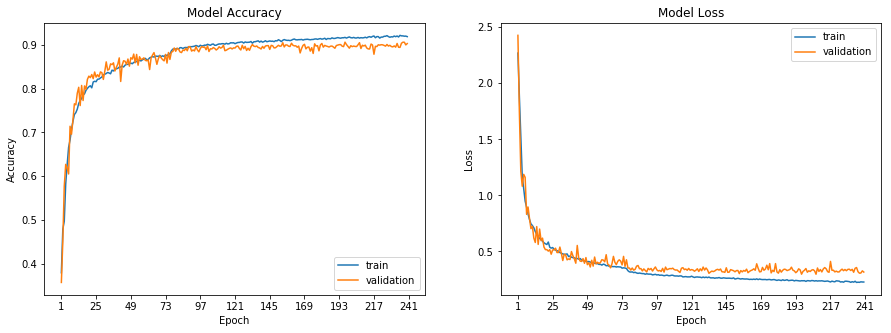

In [11]:
plot_model_details(model_details)